### Initialization
> Setting up Fastai and other necessary Librarires and Dependencies

In [26]:
import fastbook
fastbook.setup_book()

In [27]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [28]:
import nltk 
import numpy as np 
from sklearn import decomposition
from scipy import linalg
from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
from sklearn.datasets import fetch_20newsgroups

In [30]:
# Categorical Data or Features present in the Dataset
categories = ["alt.atheism", "talk.religion.misc", "comp.graphics", "sci.space"]

# Unnecessary Features or Data present in the Datasets
remove = ("headers", "footers", "quotes")

# Data for training and testing
newsgroups_train = fetch_20newsgroups(subset="train", categories= categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset="test", categories= categories, remove=remove)

# Observing the Dataset
f"Shape of Training Data {newsgroups_train.filenames.shape}", f"Shape of Testing Data {newsgroups_test.filenames.shape}"

('Shape of Training Data (2034,)', 'Shape of Testing Data (1353,)')

In [31]:
print("\n".join(newsgroups_train.data[:4]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

#### Stopwords stemming and lemmatization

In [33]:
# Observing the stopwords
from sklearn.feature_extraction import _stop_words
sorted(list(_stop_words.ENGLISH_STOP_WORDS))[:10]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

In [34]:
from nltk import stem

wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

# example
wordlist = ["organize", "organizes", "orginizing"]
display([wnl.lemmatize(word) for word in wordlist])
display([porter.stem(word) for word in wordlist])

['organize', 'organizes', 'orginizing']

['organ', 'organ', 'orgin']

In [35]:
# Processing the Data with CountVectorizer and TfidfVectorizer
vectorizer = CountVectorizer(stop_words="english")
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vocab = np.array(vectorizer.get_feature_names_out())

# Observing the shape of vectors which is recently obtained
f"Shape of vecotrs is {vectors.shape}", f"Shape of vocab is {vocab.shape}"

('Shape of vecotrs is (2034, 26576)', 'Shape of vocab is (26576,)')

In [37]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

display(U.shape, s.shape, Vh.shape)

CPU times: total: 1min 25s
Wall time: 33.4 s


(2034, 2034)

(2034,)

(2034, 26576)

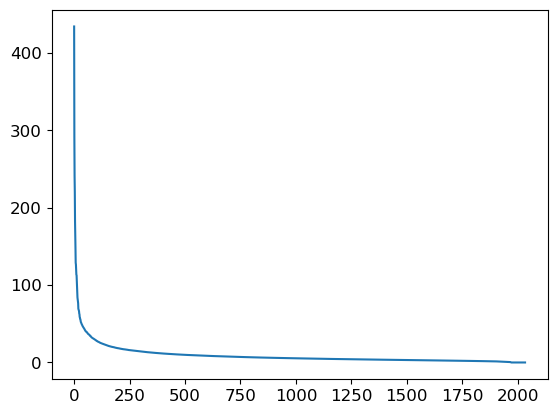

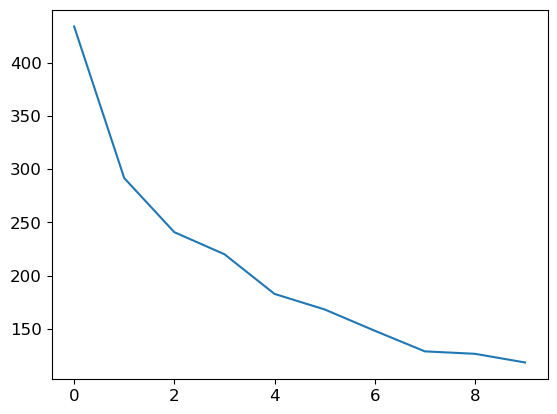

In [38]:
plt.plot(s)
plt.figure()

plt.plot(s[:10])

In [39]:
# Observing the topics using SVD
num_words = 10 #Maximum number of words in each topics
def show_topics(a):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_words-1:-1]]
    topic_words = [top_words(b) for b in a]
    return [" ".join(t) for t in topic_words]

# Observing the topics obtained
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative salvadorans ahhh',
 'jpeg gif file color quality image jfif format bit version',
 'graphics edu pub mail 128 3d ray ftp send image',
 'jesus god matthew people atheists atheism does graphics religious said',
 'image data processing analysis software available tools display tool user',
 'god atheists atheism religious believe religion argument true atheist example',
 'space nasa lunar mars probe moon missions probes surface earth',
 'image probe surface lunar mars probes moon orbit mariner mission',
 'argument fallacy conclusion example true ad argumentum premises false valid',
 'space larson image theory universe physical nasa material star unified']

In [40]:
# Implementation of NMF in Topic Modeling
num = 5

clf = decomposition.NMF(n_components=num, random_state=1)
W1 = clf.fit_transform(np.asarray(vectors))
H1 = clf.components_

show_topics(H1)

['jpeg image gif file color images format quality version files',
 'edu graphics pub mail 128 ray ftp send 3d com',
 'space launch satellite nasa commercial satellites year market data earth',
 'jesus god people matthew atheists does atheism said just believe',
 'image data available software processing ftp edu analysis images display']

In [42]:
newsgroups_train.data[10:21]

["a\n\nWhat about positional uncertainties in S-L 1993e?   I assume we know where\nand what Galileo is doing within a few meters.   But without the\nHGA,  don't we have to have some pretty good ideas, of where to look\nbefore imaging?  If the HGA was working,  they could slew around\nin near real time (Less speed of light delay).  But when they were\nimaging toutatis????  didn't someone have to get lucky on a guess to\nfind the first images?   \n\nAlso, I imagine S-L 1993e will be mostly a visual image.  so how will\nthat affect the other imaging missions.  with the LGA,  there is a real\ntight allocation of bandwidth.   It may be premature to hope for answers,\nbut I thought i'd throw it on the floor.",
 "I would like to program Tseng ET4000 to nonstandard 1024x768 mode by\nswitching to standard 1024x768 mode using BIOS and than changing some\ntiming details (0x3D4 registers 0x00-0x1F) but I don't know how to\nselect 36 MHz pixel clock I need. The BIOS function selects 40 MHz.\n\nIs t

In [43]:
# Implementation of TFIDF
vectorizer_tfidf = TfidfVectorizer(stop_words="english")
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)

# Implementation of NMF with TFIDF
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

show_topics(H1)

['people don think just like objective say morality know moral',
 'graphics thanks files image file program windows know format ftp',
 'space nasa launch shuttle orbit moon lunar earth station data',
 'ico bobbe tek beauchaine bronx manhattan sank queens vice blew',
 'god jesus bible believe christian atheism does belief faith christians']

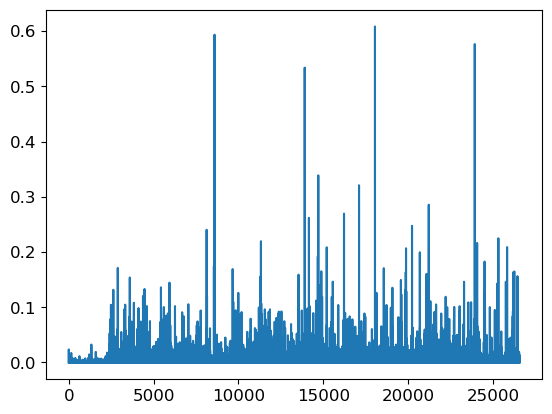

In [44]:
plt.plot(clf.components_[0])

In [45]:
import fbpca
%time U, s, Vh = fbpca.pca(vectors, 10)

CPU times: total: 3.12 s
Wall time: 1.33 s
